In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [15]:
df = pd.read_csv('chemicalCropDamage.csv')

In [16]:
df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Season,Crop_Damage
0,188,Kharif,Alluvial,Insecticides,0,0,Summer,Minimal Damage
1,209,Kharif,Alluvial,Insecticides,0,0,Monsoon,Partial Damage
2,257,Kharif,Alluvial,Insecticides,0,0,Monsoon,Partial Damage
3,257,Kharif,Black-Cotton,Insecticides,0,0,Monsoon,Partial Damage
4,342,Kharif,Alluvial,Insecticides,0,0,Monsoon,Partial Damage
...,...,...,...,...,...,...,...,...
88853,3337,Kharif,Alluvial,Herbicides,10,12,Winter,Minimal Damage
88854,3516,Kharif,Alluvial,Herbicides,10,20,Summer,Minimal Damage
88855,3516,Kharif,Alluvial,Herbicides,15,40,Monsoon,Minimal Damage
88856,3702,Kharif,Alluvial,Herbicides,10,25,Winter,Minimal Damage


In [20]:
df.Crop_Type.unique()

array(['Kharif', 'Rabi'], dtype=object)

In [21]:
df.Pesticide_Use_Category.unique()

array(['Insecticides', 'Bactericides', 'Herbicides'], dtype=object)

In [22]:
df.Crop_Damage.value_counts()

Minimal Damage        74238
Partial Damage        12307
Significant Damage     2313
Name: Crop_Damage, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Estimated_Insects_Count'>

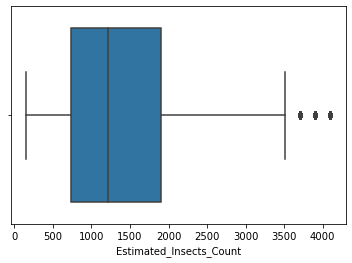

In [23]:
sns.boxplot(df.Estimated_Insects_Count)

In [24]:
q1, q3 = np.percentile(df.Estimated_Insects_Count,[25, 75])

In [25]:
q1, q3

(731.0, 1898.0)

In [26]:
insects = []
def insect_classification(insect):
    if insect < 731:
        return 0
    elif insect >= 731 and insect < 1898:
        return 1
    elif insect >= 1898 and insect < 3200:
        return 2
    else: 
        return 3

In [27]:
for ins in df.Estimated_Insects_Count:
    a = insect_classification(int(ins))
    insects.append(a)

In [28]:
len(insects)

88858

In [29]:
df['Insects_Labeled'] = insects

In [30]:
df.Crop_Damage.unique()

array(['Minimal Damage', 'Partial Damage', 'Significant Damage'],
      dtype=object)

In [31]:
df = df.drop(['Estimated_Insects_Count'], axis=1)

In [32]:
df_minimal = df[df['Crop_Damage'] == 'Minimal Damage']
df_partial = df[df['Crop_Damage'] == 'Partial Damage']
df_high = df[df['Crop_Damage'] == 'Significant Damage']

In [33]:
df_minimal_sample = df_minimal.sample(n = 12307)

In [34]:
df_minimal_sample.Crop_Type.value_counts()

Rabi      8772
Kharif    3535
Name: Crop_Type, dtype: int64

In [35]:
df_partial.Crop_Type.value_counts()

Rabi      9204
Kharif    3103
Name: Crop_Type, dtype: int64

## Null Values

In [36]:
sns.heatmap(df_final.isnull())

NameError: name 'df_final' is not defined

In [37]:
df_final.Crop_Type.value_counts()

NameError: name 'df_final' is not defined

<AxesSubplot:xlabel='Crop_Damage', ylabel='count'>

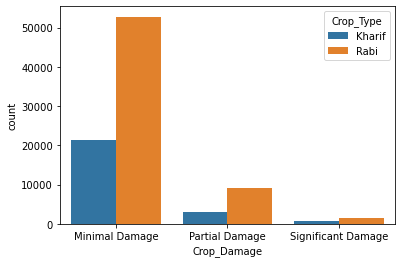

In [302]:
sns.countplot(df['Crop_Damage'], hue = df['Crop_Type'])

## We can further downsample to get a balanced dataset

In [38]:
df_minimal_rabi = df_minimal[df.Crop_Type == 'Rabi']
df_minimal_rabi_sample = df_minimal_rabi.sample(n = 3599)
df_partial_rabi = df_partial[df_partial.Crop_Type == 'Rabi']
df_partial_rabi_sample = df_partial_rabi.sample(n = 3103)

C:\Users\shvmt\AppData\Local\Temp/ipykernel_5240/2534438591.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_minimal_rabi = df_minimal[df.Crop_Type == 'Rabi']


In [39]:
df_minimal_kharif = df_minimal_sample[df_minimal_sample.Crop_Type == 'Kharif']
df_partial_kharif = df_partial[df_partial.Crop_Type == "Kharif"]

In [40]:
df_final = pd.concat([df_minimal_kharif, df_minimal_rabi_sample, df_partial_rabi_sample, df_partial_kharif, df_high], axis=0)

In [73]:
df_final

,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Season,Crop_Damage,Insects_Labeled
73495,Kharif,Alluvial,Herbicides,20,27,Winter,Minimal Damage,1
41449,Kharif,Black-Cotton,Bactericides,15,40,Monsoon,Minimal Damage,2
41184,Kharif,Black-Cotton,Bactericides,20,8,Summer,Minimal Damage,0
43222,Kharif,Alluvial,Herbicides,30,24,Summer,Minimal Damage,1
12597,Kharif,Alluvial,Herbicides,20,19,Monsoon,Minimal Damage,1
...,...,...,...,...,...,...,...,...
88470,Rabi,Black-Cotton,Herbicides,40,40,Summer,Significant Damage,2
88479,Rabi,Black-Cotton,Herbicides,25,50,Winter,Significant Damage,3
88493,Rabi,Black-Cotton,Herbicides,60,48,Summer,Significant Damage,3
88552,Kharif,Alluvial,Herbicides,20,20,Monsoon,Significant Damage,0


In [74]:
df_final.Pesticide_Use_Category.unique()

array(['Herbicides', 'Bactericides', 'Insecticides'], dtype=object)

In [43]:
df_final.Season.unique()

array(['Winter', 'Monsoon', 'Summer'], dtype=object)

In [42]:
df_final.columns

Index(['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Number_Doses_Week',
       'Number_Weeks_Used', 'Season', 'Crop_Damage', 'Insects_Labeled'],
      dtype='object')

<AxesSubplot:xlabel='Crop_Damage', ylabel='count'>

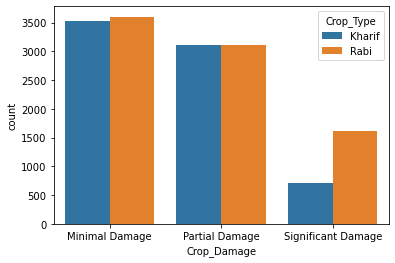

In [307]:
sns.countplot(df_final['Crop_Damage'], hue = df_final['Crop_Type'])

## Much better

<AxesSubplot:xlabel='Pesticide_Use_Category', ylabel='count'>

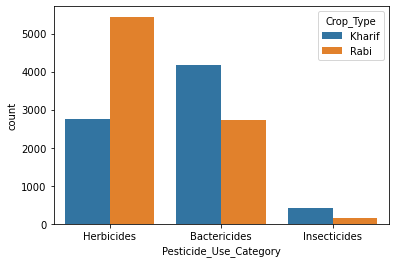

In [308]:
sns.countplot(df_final.Pesticide_Use_Category, hue = df_final['Crop_Type'])

In [311]:
df_final.Soil_Type.value_counts()

Alluvial        9334
Black-Cotton    6308
Name: Soil_Type, dtype: int64

<AxesSubplot:xlabel='Soil_Type', ylabel='count'>

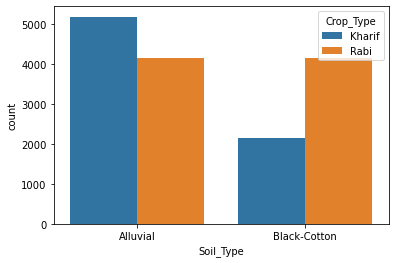

In [312]:
sns.countplot(df_final['Soil_Type'], hue = df_final['Crop_Type'])

<AxesSubplot:xlabel='Soil_Type', ylabel='count'>

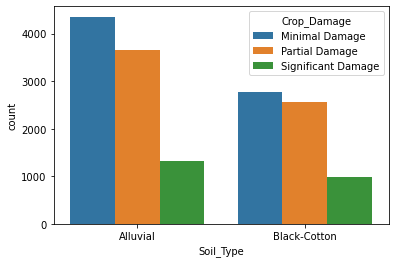

In [313]:
sns.countplot(df_final['Soil_Type'], hue = df_final['Crop_Damage'])

In [314]:
df_final.Pesticide_Use_Category.value_counts()

Herbicides      8185
Bactericides    6903
Insecticides     554
Name: Pesticide_Use_Category, dtype: int64

In [315]:
df_final.Season.value_counts()

Monsoon    7928
Summer     4631
Winter     3083
Name: Season, dtype: int64

In [316]:
df.Crop_Damage.unique()

array(['Minimal Damage', 'Partial Damage', 'Significant Damage'],
      dtype=object)

In [75]:
X = df_final.drop(['Crop_Damage'], axis=1)
y = df_final.Crop_Damage

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=7)

In [77]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [78]:
transformer = make_column_transformer(
    (OneHotEncoder(), ["Crop_Type", "Soil_Type", "Pesticide_Use_Category", "Season"]),
                                             remainder = 'passthrough')

In [79]:
X_train_transformed = transformer.fit_transform(X_train)
X_train_encoded = pd.DataFrame(X_train_transformed, columns=transformer.get_feature_names_out())

In [322]:
X_train_encoded

,onehotencoder__Crop_Type_Kharif,onehotencoder__Crop_Type_Rabi,onehotencoder__Soil_Type_Alluvial,onehotencoder__Soil_Type_Black-Cotton,onehotencoder__Pesticide_Use_Category_Bactericides,onehotencoder__Pesticide_Use_Category_Herbicides,onehotencoder__Pesticide_Use_Category_Insecticides,onehotencoder__Season_Monsoon,onehotencoder__Season_Summer,onehotencoder__Season_Winter,remainder__Number_Doses_Week,remainder__Number_Weeks_Used,remainder__Insects_Labeled
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,20.0,20.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,52.0,2.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,15.0,10.0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,30.0,42.0,2.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,40.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12508,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,40.0,40.0,1.0
12509,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,48.0,2.0
12510,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,35.0,25.0,0.0
12511,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,20.0,39.0,2.0


In [80]:
X_test_transformed = transformer.transform(X_test)
X_test_encoded = pd.DataFrame(X_test_transformed, columns=transformer.get_feature_names_out())

In [81]:
X_test_encoded

,onehotencoder__Crop_Type_Kharif,onehotencoder__Crop_Type_Rabi,onehotencoder__Soil_Type_Alluvial,onehotencoder__Soil_Type_Black-Cotton,onehotencoder__Pesticide_Use_Category_Bactericides,onehotencoder__Pesticide_Use_Category_Herbicides,onehotencoder__Pesticide_Use_Category_Insecticides,onehotencoder__Season_Monsoon,onehotencoder__Season_Summer,onehotencoder__Season_Winter,remainder__Number_Doses_Week,remainder__Number_Weeks_Used,remainder__Insects_Labeled
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,60.0,24.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,25.0,28.0,1.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,15.0,54.0,3.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,10.0,22.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,20.0,38.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,60.0,31.0,0.0
3127,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,10.0,31.0,1.0
3128,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3129,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,30.0,28.0,2.0


In [82]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [261]:
y.value_counts()

Minimal Damage        7198
Partial Damage        6206
Significant Damage    2313
Name: Crop_Damage, dtype: int64

In [262]:
num_class1, num_class2, num_class3 = y.value_counts().values

In [263]:
print(num_class1, num_class2, num_class3)

7198 6206 2313


In [336]:
cat_vals = X_train_encoded.columns.tolist()
cat_vals.remove('remainder__Number_Doses_Week')
cat_vals.remove('remainder__Number_Weeks_Used')

In [342]:
sm = SMOTENC(categorical_features=cat_vals, sampling_strategy= {"Significant Damage": int(3.1*num_class3)})

In [343]:
sm

SMOTENC(categorical_features=['onehotencoder__Crop_Type_Kharif',
                              'onehotencoder__Crop_Type_Rabi',
                              'onehotencoder__Soil_Type_Alluvial',
                              'onehotencoder__Soil_Type_Black-Cotton',
                              'onehotencoder__Pesticide_Use_Category_Bactericides',
                              'onehotencoder__Pesticide_Use_Category_Herbicides',
                              'onehotencoder__Pesticide_Use_Category_Insecticides',
                              'onehotencoder__Season_Monsoon',
                              'onehotencoder__Season_Summer',
                              'onehotencoder__Season_Winter',
                              'remainder__Insects_Labeled'],
        sampling_strategy={'Significant Damage': 7170})

In [ ]:
X_train_encodedcoded.value_counts()

In [353]:
X_train_encoded, y_train = sm.fit_resample(X_train_encoded, y_train)

ValueError: Some of the categorical indices are out of range. Indices should be between 0 and 12

In [345]:
X_train_encoded

,onehotencoder__Crop_Type_Kharif,onehotencoder__Crop_Type_Rabi,onehotencoder__Soil_Type_Alluvial,onehotencoder__Soil_Type_Black-Cotton,onehotencoder__Pesticide_Use_Category_Bactericides,onehotencoder__Pesticide_Use_Category_Herbicides,onehotencoder__Pesticide_Use_Category_Insecticides,onehotencoder__Season_Monsoon,onehotencoder__Season_Summer,onehotencoder__Season_Winter,remainder__Number_Doses_Week,remainder__Number_Weeks_Used,remainder__Insects_Labeled
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,20.0,20.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,52.0,2.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,15.0,10.0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,30.0,42.0,2.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,40.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12508,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,40.0,40.0,1.0
12509,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,48.0,2.0
12510,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,35.0,25.0,0.0
12511,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,20.0,39.0,2.0


In [248]:
from sklearn.metrics import f1_score

In [275]:
est = np.arange(50, 501, 25)
depth = np.arange(3, 21, 1)
score = []
for ne in est:
    for d in depth:
        model = LGBMClassifier(n_estimators=ne, max_depth=d, random_state=7)
        model.fit(X_train_encoded, y_train)
        y_pred = model.predict(X_test_encoded)
        score.append([ne ,d ,f1_score(y_pred, y_test, average='weighted')])
np.argmax(score)

972

## 0.86 at ne = 375 and d = 14

In [349]:
model = LGBMClassifier(n_estimators=375, max_depth=14, random_state=7)
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)

In [350]:
print(classification_report(y_pred, y_test))

                    precision    recall  f1-score   support

    Minimal Damage       0.76      0.66      0.71      1604
    Partial Damage       0.58      0.55      0.57      1320
Significant Damage       0.16      0.38      0.23       205

          accuracy                           0.59      3129
         macro avg       0.50      0.53      0.50      3129
      weighted avg       0.65      0.59      0.62      3129



In [348]:
from sklearn.metrics import precision_score
print(precision_score(y_pred, y_test, average='weighted'))

0.6461299892020128


In [70]:
from xgboost import XGBClassifier

In [71]:
import xgboost
xgboost.__version__

'1.5.1'

In [354]:
score_xgb = []
for ne in est:
    for d in depth:
        model = XGBClassifier(n_estimators=ne, max_depth=d, random_state=7, learning_rate=0.01)
        model.fit(X_train_encoded, y_train)
        y_pred = model.predict(X_test_encoded)
        score_xgb.append([ne ,d ,f1_score(y_pred, y_test, average='weighted')])

[01:38:39] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:38:39] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:38:39] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:38:40] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation

[01:39:23] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:39:26] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:39:30] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:39:34] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation

[01:40:58] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:40:59] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:41:01] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:41:03] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation

[01:43:13] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:43:24] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:43:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:43:46] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation

[01:45:52] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:45:57] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:46:04] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:46:13] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation

[01:50:02] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:50:04] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:50:05] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:50:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation

[01:53:47] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:54:02] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:54:19] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:54:37] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation

[01:59:03] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:59:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:59:13] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:59:20] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation

[02:05:17] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:05:43] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:06:10] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:06:12] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation

[02:11:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:11:21] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:11:38] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:11:57] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation

[02:19:32] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:19:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:19:39] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:19:44] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation

[02:26:50] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:27:19] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:27:52] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:28:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation

In [355]:
score_xgb

[[50, 3, 0.6537792227046059],
 [50, 4, 0.64390268520854],
 [50, 5, 0.6460559858059715],
 [50, 6, 0.6411744720031493],
 [50, 7, 0.6278473364059425],
 [50, 8, 0.6249703227329525],
 [50, 9, 0.6153865879048053],
 [50, 10, 0.6210380654465516],
 [50, 11, 0.6146253165501807],
 [50, 12, 0.607030736797369],
 [50, 13, 0.5976489524673133],
 [50, 14, 0.5926240955857346],
 [50, 15, 0.5870056964690012],
 [50, 16, 0.5867370478472009],
 [50, 17, 0.5843144528139665],
 [50, 18, 0.5826677210458491],
 [50, 19, 0.5784706133977142],
 [50, 20, 0.5786060826670356],
 [75, 3, 0.6516957151321757],
 [75, 4, 0.645587111661882],
 [75, 5, 0.6453977237634957],
 [75, 6, 0.6417784891188311],
 [75, 7, 0.6278945665112478],
 [75, 8, 0.6238816842102685],
 [75, 9, 0.6177428488841535],
 [75, 10, 0.6151469137006303],
 [75, 11, 0.6132239164139881],
 [75, 12, 0.6035420856896194],
 [75, 13, 0.5947197172609385],
 [75, 14, 0.5942909357542425],
 [75, 15, 0.5885299671310648],
 [75, 16, 0.5870935889425909],
 [75, 17, 0.58418367971230

In [83]:
xgb = XGBClassifier(n_estimators = 75, max_depth = 3)
xgb.fit(X_train_encoded, y_train)
y_pred = xgb.predict(X_test_encoded)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:17:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [86]:
y_pred = list(y_pred)
y_pred.index('Significant Damage')

28

In [90]:
X_test[28]

KeyError: 28

In [359]:
print(classification_report(y_pred, y_test))

                    precision    recall  f1-score   support

    Minimal Damage       0.80      0.66      0.72      1670
    Partial Damage       0.58      0.56      0.57      1308
Significant Damage       0.13      0.42      0.20       151

          accuracy                           0.60      3129
         macro avg       0.50      0.55      0.50      3129
      weighted avg       0.67      0.60      0.63      3129



In [362]:
import pickle
file_name = "xgb_reg.pkl"

# save
pickle.dump(xgb, open(file_name, "wb"))

# load
# xgb_loaded = pickle.load(open(file_name, "rb"))

In [65]:
import pickle
pickle.dump(transformer, open("transformer_reg.pkl" ,"wb"))

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

#df=pd.read_excel("crop_data_dict.xlsx")

def insect_classification(insect):
    if insect == 'Low':
        return 0
    elif insect == 'Average':
        return 1
    elif insect == 'High'
        return 2
    elif: insect == 'Very High'
        return 3
    
    xgb_loaded = pickle.load(open("transformer_reg.pkl", "rb"))
def page_1():
    st.title("Predict Damage to Crops")
    insects = st.selectbox("Insects in field (Estimate)", ("Low", "Average", "High", "Very High"))
    crop_type = st.selectbox("Crop Type", ("Kharif", "Rabi"))
    soil_type = st.selectbox("Soil Type", ("Alluvial", "Black-Cotton"))
    season = st.selectbox("Season", ('Winter', 'Monsoon', 'Summer'))
    pesticide_use_category = st.selectbox("Pesticide Category", ("Insecticide", 'Bactericides', 'Herbicides'))
    number_of_doses_in_a_week = st.number_input("Number of Doses in a Week", min_value=0, max_value=100, value=0)
    number_of_weeks_used = st.number_input("Number of Weeks Used", min_value=0, max_value=52, value=0)
    
    insects_label = insect_classification(insects)
    inp = pd.DataFrame({'Crop_Type': crop_type, 'Soil_Type': soil_type, 'Pesticide_Use_Category': pesticide_use_category, 
                        'Number_Doses_Week': number_of_doses_in_a_week, 'Number_Weeks_Used': number_of_weeks_used, 
                        'Season': season, 'Insects_Labeled': insects_label})
    inp_transformed = transformer.transform(inp)
    inp_transformed_encoded = pd.DataFrame(inp_transformed, columns=transformer.get_feature_names_out())
    
def main():
    st.sidebar.title("Navigation")
    page = st.sidebar.selectbox("Select a Tool", ["Crop Damage", "Crop Production"])
    
    st.write("NAME OF OUR FARMER PROJECT")
    
    if page == "Crop Damage":
        page_1()

if __name__ == '__main__':
    main()

In [51]:

def insect_classification(insect):
    if insect == 'Low':
        return 0
    elif insect == 'Average':
        return 1
    elif insect == 'High':
        return 2
    elif insect == 'Very High':
        return 3

In [66]:
    insects = "High"
    crop_type = "Rabi"
    soil_type = "Alluvial"
    season = 'Winter'
    pesticide_use_category = 'Bactericides'
    number_of_doses_in_a_week = 21
    number_of_weeks_used = 5

    insects_label = insect_classification(insects)
    inp = pd.DataFrame(
        {'Crop_Type': [crop_type], 'Soil_Type': [soil_type], 'Pesticide_Use_Category': [pesticide_use_category],
         'Number_Doses_Week': [number_of_doses_in_a_week], 'Number_Weeks_Used': [number_of_weeks_used],
         'Season': [season], 'Insects_Labeled': [insects_label]})
    print(inp)
    transformer = pickle.load(open("transformer_reg.pkl", "rb"))
    inp_transformed = transformer.transform(inp)
    inp_transformed_encoded = pd.DataFrame(inp_transformed, columns=transformer.get_feature_names_out())
    xgb = pickle.load(open("xgb_reg.pkl", "rb"))
    output = xgb.predict(inp_transformed_encoded)
    print(output)

  Crop_Type Soil_Type Pesticide_Use_Category  Number_Doses_Week  \
0      Rabi  Alluvial           Bactericides                 21   

   Number_Weeks_Used  Season  Insects_Labeled  
0                  5  Winter                2  
['Significant Damage']


In [69]:
output = output[0]
if output == 'Minimal Damage':
    st.success(output)
elif output == 'Partial Damage':
    st.warning(output, icon="⚠️")
elif output == 'Significan Damage':
    st.warning(output, icon='💀')

NameError: name 'xgboost' is not defined